The "z-test" and "t-test" are both statistical tests used to make inferences about population parameters based on sample data. However, they are used under different circumstances due to differences in assumptions and conditions.

1. **Z-test:**
   - The z-test is used when the population standard deviation is known, or the sample size is large (typically n > 30).
   - It is used to compare a sample mean to a known population mean when the population standard deviation is known.
   - The z-test statistic follows a standard normal distribution (mean of 0 and standard deviation of 1) under the null hypothesis.

2. **T-test:**
   - The t-test is used when the population standard deviation is unknown and must be estimated from the sample, or when the sample size is small (typically n < 30).
   - It is used to compare the means of two samples or to compare a sample mean to a known population mean when the population standard deviation is unknown.
   - The t-test statistic follows a Student's t-distribution with n-1 degrees of freedom under the null hypothesis, where n is the sample size.

T-tests come in different variations depending on the study design and the number of groups being compared. Common types of t-tests include:

- **One-sample t-test:** Used to determine if the mean of a single sample differs significantly from a known or hypothesized population mean.
- **Independent samples t-test (two-sample t-test):** Used to compare the means of two independent groups to determine if they are significantly different from each other.
- **Paired samples t-test:** Used to compare the means of two related groups (e.g., before and after measurements) to determine if there is a significant difference between the two means.

In summary, the choice between z-test and t-test depends on factors such as the known population standard deviation, sample size, and whether the samples are independent or related. The z-test is used when the population standard deviation is known or the sample size is large, while the t-test is used when the population standard deviation is unknown or the sample size is small.

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sn
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

# Z-test

In [2]:
passport_df=pd.read_csv("passport.csv")
passport_df.head(5)

processing_time
0             16.0
1             16.0
2             30.0
3             37.0
4             25.0

In [3]:
def z_test(pop_mean,pop_std,sample):
    z_score=(sample.mean()-pop_mean)/pop_std/math.sqrt(len(sample))
    return z_score,stats.norm.cdf(z_score)


In [4]:
z_test(30,12.5,passport_df.processing_time)

(-0.037314876389986866, 0.4851169720548894)

##### Conclusion : 0.4851 > 0.05 ;Fail to reject H0(accept HO) 

Note:-In Python, stats.norm.cdf is a function from the scipy.stats module, specifically from the norm class, and it is used to compute the cumulative distribution function (CDF) of a normal (Gaussian) distribution.

The cumulative distribution function of a random variable X, evaluated at x, is the probability that X will take a value less than or equal to x.

This function is particularly useful in statistics and probability theory for calculating probabilities associated with normal distributions, such as finding the probability of a random variable falling within a certain range or below a certain value.

# One  T-test

In [5]:
bollywood_movies_df=pd.read_csv("bollywoodmovies.csv")
bollywood_movies_df.head(5)

production_cost
0              601
1              627
2              330
3              364
4              562

In [6]:
stats.ttest_1samp(bollywood_movies_df.production_cost,500)

TtestResult(statistic=-2.2845532872667547, pvalue=0.027862556406761777, df=39)

##### Conclusion:0.02786255<0.05(pvalue< alpha);reject HO

Note:-A one-sample t-test is used when you have a single group of samples and you want to determine whether the mean of that group is significantly different from a known or hypothesized value.
The function ttest_1samp() takes two arguments:

data: The array representing the sample data.
popmean (population mean): The hypothesized population mean against which you want to test the sample mea

# Two Smaple T-Test

In [7]:
healthdrink_yes_df=pd.read_excel('healthdrink.xlsx',"healthdrink_yes")
healthdrink_no_df=pd.read_excel('healthdrink.xlsx','healthdrink_no')

In [8]:
stats.ttest_ind(healthdrink_yes_df['height_increase'],healthdrink_no_df['height_increase'])

TtestResult(statistic=8.131675069083359, pvalue=1.197698592263946e-13, df=157.0)

##### Conclusion: 1.1976 > 0.05 ; Fail to reject H0

Note:-In Python, stats.ttest_ind is a function from the scipy.stats module, and it is used to perform a t-test for the means of two independent samples. The t-test is a statistical test used to determine whether there is a significant difference between the means of two groups.

The function ttest_ind() takes two arrays representing the two independent samples as input and returns two values:

t_statistic: The calculated t-statistic, which measures the difference between the means of the two samples relative to the variance in the data.
p_value: The p-value associated with the test, which indicates the probability of observing the given t-statistic under the null hypothesis that the means of the two samples are equal.
Researchers often use the p-value to determine the statistical significance of the difference between the means of the two samples. If the p-value is less than a chosen significance level (often 0.05), it suggests that there is sufficient evidence to reject the null hypothesis and conclude that the means of the two samples are significantly different.

# Paired Sample T-Test

In [9]:
breakup_df=pd.read_csv("breakups.csv")
breakup_df.head(5)

Before_Breakup  After_Breakup
0             470            408
1             354            439
2             496            321
3             351            437
4             349            335

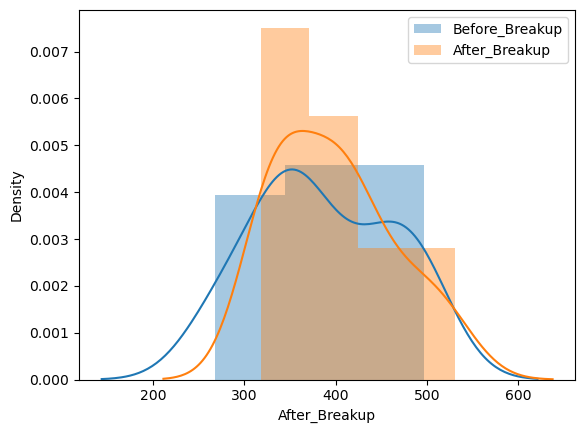

In [10]:
sn.distplot(breakup_df['Before_Breakup'],label='Before_Breakup')
sn.distplot(breakup_df['After_Breakup'],label="After_Breakup")
plt.legend()
plt.show()

In [11]:
stats.ttest_rel(breakup_df['After_Breakup'],breakup_df['Before_Breakup'])

TtestResult(statistic=0.5375404241815106, pvalue=0.5971346738292477, df=19)

##### Conclusion : 0.597134> 0.05 ;fail to reject HO

Note:-In Python, stats.ttest_rel is a function from the scipy.stats module, and it is used to perform a paired sample t-test.

A paired sample t-test is used when you have two related groups of samples, and you want to determine whether there is a significant difference between the means of the two groups. The samples in each group are related or paired in some way, such as being measurements taken from the same individuals before and after an intervention.

The function ttest_rel() takes two arrays representing the paired samples as input and returns two values:

t_statistic: The calculated t-statistic, which measures the difference between the means of the paired samples relative to the variance in the data.
p_value: The p-value associated with the test, which indicates the probability of observing the given t-statistic under the null hypothesis that the means of the paired samples are equal.
As with other hypothesis tests, researchers often use the p-value to determine the statistical significance of the difference between the means of the paired samples. If the p-value is less than a chosen significance level (often 0.05), it suggests that there is sufficient evidence to reject the null hypothesis and conclude that the means of the paired samples are significantly different.